In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
letter = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\letter-unsupervised-ad.csv', header = None)


In [3]:
letter

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,6.0,10.0,5.0,6.0,3.0,10.0,6.0,4.0,6.0,14.0,...,0.0,8.0,14.0,6.0,6.0,0.0,10.0,2.0,7.0,n
1,0.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,0.0,7.0,13.0,6.0,8.0,0.0,8.0,1.0,7.0,n
2,4.0,7.0,5.0,5.0,3.0,7.0,8.0,2.0,7.0,7.0,...,1.0,7.0,7.0,6.0,8.0,0.0,8.0,2.0,8.0,n
3,1.0,6.0,1.0,4.0,2.0,7.0,7.0,0.0,7.0,7.0,...,1.0,8.0,7.0,6.0,8.0,0.0,8.0,3.0,8.0,n
4,1.0,2.0,1.0,3.0,1.0,7.0,7.0,1.0,7.0,7.0,...,1.0,8.0,7.0,6.0,9.0,0.0,8.0,3.0,8.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.0,6.0,0.0,4.0,0.0,7.0,7.0,4.0,4.0,7.0,...,10.0,4.0,7.0,12.0,8.0,2.0,10.0,0.0,8.0,o
1596,5.0,8.0,6.0,7.0,6.0,6.0,9.0,5.0,7.0,8.0,...,4.0,14.0,9.0,6.0,8.0,0.0,8.0,8.0,8.0,o
1597,4.0,9.0,4.0,4.0,2.0,7.0,10.0,2.0,5.0,13.0,...,7.0,5.0,10.0,8.0,7.0,3.0,8.0,3.0,8.0,o
1598,6.0,10.0,6.0,7.0,5.0,5.0,11.0,3.0,7.0,11.0,...,2.0,3.0,12.0,6.0,5.0,2.0,9.0,8.0,8.0,o


In [4]:
shuffled_df = letter.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))


In [5]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,32
0,0
1,0
2,0
3,0
4,0
...,...
1595,0
1596,0
1597,0
1598,0


In [6]:
accuracies = []
auc_scores = []
for i in range(10):
  iforest = IForest()
  iforest.fit(df)
  iforest_pred = iforest.labels_
  iforest_scores = iforest.decision_scores_
  
  iforest_accuracy = accuracy_score(y,iforest_pred)
  roc_auc = roc_auc_score(y, iforest_scores)

  accuracies.append(iforest_accuracy)
  auc_scores.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_auc = np.mean(auc_scores)
  
print(avg_accuracy)
print(avg_auc)

0.8545
0.6228553333333333


In [6]:
iforest = IForest()
iforest.fit(df)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [7]:
iforest_pred = iforest.labels_
iforest_accuracy = accuracy_score(y,iforest_pred)
print(iforest_accuracy)

0.85375


In [8]:
iforest_scores = iforest.decision_scores_

F1-score: 0.10
0.6187333333333334


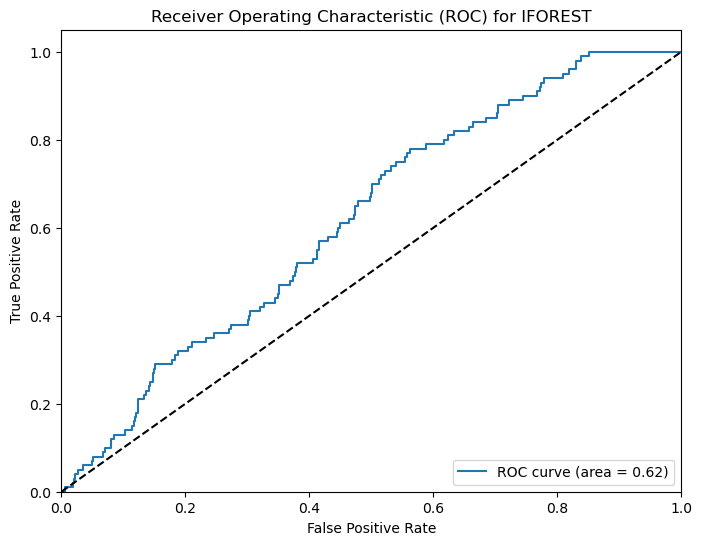

In [9]:
ifor_f1 = f1_score(y, iforest_pred)
print(f"F1-score: {ifor_f1:.2f}")

roc_auc = roc_auc_score(y, iforest_scores)
print(roc_auc)

ifor_fpr, ifor_tpr, _ = roc_curve(y, iforest_scores)

plt.figure(figsize=(8, 6))
plt.plot(ifor_fpr, ifor_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for IFOREST')
plt.legend(loc="lower right")
plt.show()